# Purpose: To Test the Sci-kit Image Thresholds for the Landry Collab Images

Date Created: October 12th, 2021

Dates Edited: October 12th, 2021 - Converted from the original notebook for the microFIBER paper

*Step 1: Import necessary packages*

In [9]:
#import operating system
import os

# import major packages
import numpy as np
import matplotlib.pyplot as plt
import skimage
import PIL as Image

Separating the two imports so that it is a cleaner workflow

In [10]:
# import specific package functions
from skimage import io
from skimage.filters import try_all_threshold
from skimage.filters import threshold_isodata
from skimage.filters import threshold_li
from skimage.filters import threshold_mean
from skimage.filters import threshold_minimum
from skimage.filters import threshold_otsu
from skimage.filters import threshold_triangle
from skimage.filters import threshold_yen

from skimage import morphology
from scipy import ndimage
from skimage.measure import label

## Landry Collab: Huntington's Disease Image Set

*Step 2: Import image for testing thresholds*

For the landry collab we have images in 7 groups (blinded to this analysis).  

Each of the 7 groups includes 3 magnifications:

1. a 20x tile scan
2. a set of 40x images (no zoom)
3. a set of 40x images zoomed X6

Each of group 2 and three above include both the left and right hemispheres and the substantia nigra pars compacta (SNc) and the striatum (Str)

We are beginning the analysis only on the 40x no zoon images across both regions and hemispheres.  To pick the threshold, we will run and test all the 40x images in each group (4 images per group).

In [19]:
#Defining the local folder location for all files
im_folder_location = '/Users/hhelmbre/Desktop/Landry_collab'

In [12]:
def folder_cleaner(folder, image_type):
    k=0
    for files in folder:
        if image_type in str(files):
            k+=1
        else:
            folder = np.delete(folder, np.argwhere(folder == str(files)))
    return folder

In [20]:
arr = os.listdir(im_folder_location)
animal_list = np.asarray(arr)

#Since I am working on a mac operating system, this removes the DS_store file
animal_list = animal_list[1:]
animal_list

array(['F4CL_L3_FL_RT', 'F4A1_L3_F_LT_1', 'F4CL_L3_F_RT_1',
       'F4A1_L3_F_RT_1', 'F4A1_L3_M2_RT_2', 'F4CL_L3_M_CT_2',
       'F4CL_L3_F_LT_2'], dtype='<U15')

In [ ]:

for folders in animal_list:
    sub_folder_location = 

In [3]:
im_name = '4-50-12_40x_thalamus_3.tif'

im_location = str(im_folder_location + im_name)

In [220]:
im = io.imread(im_location)

In [221]:
#For the OGD data set the microglia images are the second color channel of the .tif stack. 
#The first channel is the dapi and a 3rd channel was an unused red laser
#Pythonically channel 1 = 0, channel 2 = 1, and channel 3 = 2 on the third dimension for these images
microglia_im = im[:,:,1]

*Step 3: Trying multiple tresholds at once and saving the composite image*

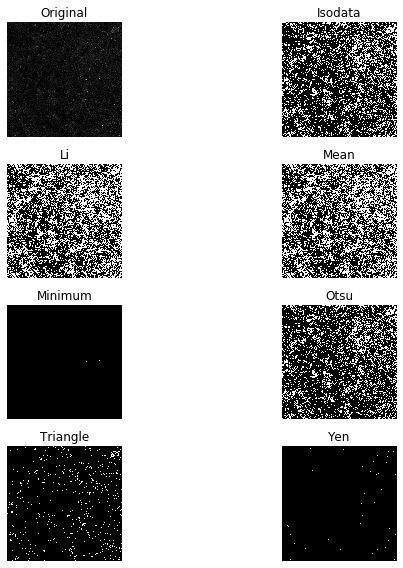

In [222]:
fig, ax = try_all_threshold(microglia_im, figsize=(10, 8), verbose=False)

fig_name = str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_all_thresh.tif')
fig.savefig(fig_name)
plt.show()

*Step 4: Trying the thresholds individually to save each image separately for comparison with manual segmentation*

To determine the size of the small object we should remove we took the size of microglia which are approximately 1600 um^2 according to (https://jneuroinflammation.biomedcentral.com/articles/10.1186/s12974-014-0182-7)

The confocal settings for the OGD severity study provided a 1 pixel = 3.4527 um conversion. To ensure we didn't cut off any potential microglia, we chose a cutoff on the small end to be 1/2 of the average which converts to 71 pixels ^2 used in the min_size of the remove small objects function from sci-kit image.

In [223]:
#isodata threshold
thresh_isodata = skimage.filters.threshold_isodata(microglia_im)
binary_isodata = microglia_im > thresh_isodata
new_binary_isodata = morphology.remove_small_objects(binary_isodata, min_size=71)
new_binary_isodata = ndimage.binary_fill_holes(new_binary_isodata)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_isodata_thresh'), new_binary_isodata)

#li threshold
thresh_li = skimage.filters.threshold_li(microglia_im)
binary_li = microglia_im > thresh_li
new_binary_li = morphology.remove_small_objects(binary_li, min_size=71)
new_binary_li = ndimage.binary_fill_holes(new_binary_li)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_li_thresh'), new_binary_li)

#Mean threshold
thresh_mean = skimage.filters.threshold_mean(microglia_im)
binary_mean = microglia_im > thresh_mean
new_binary_mean = morphology.remove_small_objects(binary_mean, min_size=71)
new_binary_mean = ndimage.binary_fill_holes(new_binary_mean)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_mean_thresh'), new_binary_mean)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_minimum_thresh'), new_binary_minimum)

#Otsu threshold
thresh_otsu = skimage.filters.threshold_otsu(microglia_im)
binary_otsu = microglia_im > thresh_otsu
new_binary_otsu = morphology.remove_small_objects(binary_otsu, min_size=71)
new_binary_otsu = ndimage.binary_fill_holes(new_binary_otsu)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_otsu_thresh'), new_binary_otsu)

#triangle threshold
thresh_triangle = skimage.filters.threshold_triangle(microglia_im)
binary_triangle = microglia_im > thresh_triangle
new_binary_triangle = morphology.remove_small_objects(binary_triangle, min_size=71)
new_binary_triangle = ndimage.binary_fill_holes(new_binary_triangle)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_triangle_thresh'), new_binary_triangle)

#yen threshold
thresh_yen = skimage.filters.threshold_yen(microglia_im)
binary_yen = microglia_im > thresh_yen
new_binary_yen = morphology.remove_small_objects(binary_yen, min_size=71)
new_binary_yen = ndimage.binary_fill_holes(new_binary_yen)

np.save(str(im_folder_location + 'all_thresh/' + im_name[:-4] + '_yen_thresh'), new_binary_yen)

#Minimum threshold
thresh_minimum = skimage.filters.threshold_minimum(microglia_im)
binary_minimum = microglia_im > thresh_minimum
new_binary_minimum = morphology.remove_small_objects(binary_minimum, min_size=71)
new_binary_minimum = ndimage.binary_fill_holes(new_binary_minimum)